In [1]:
import pandas as pd
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
# import missingno as msno 

In [2]:
col_names = ['sex', 'length', 'diameter', 'height', 'wholeWeight', 'shuckedWeight', 'visceraWeight', 'shellWeight', 'rings', 'legalHarvest']
df = pd.read_csv("abelone_subset.csv",header=None, names=col_names)
df.head()

,sex,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,rings,legalHarvest
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


In [3]:
#Columns in the data
print(df.columns)

Index(['sex', 'length', 'diameter', 'height', 'wholeWeight', 'shuckedWeight',
       'visceraWeight', 'shellWeight', 'rings', 'legalHarvest'],
      dtype='object')


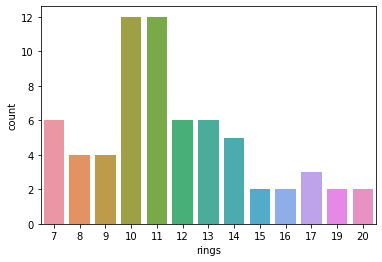

In [4]:
sns.countplot(df['rings'],label="count")

In [5]:
#Check for any null values
df.isnull().sum()

sex              0
length           0
diameter         0
height           0
wholeWeight      0
shuckedWeight    0
visceraWeight    0
shellWeight      0
rings            0
legalHarvest     0
dtype: int64

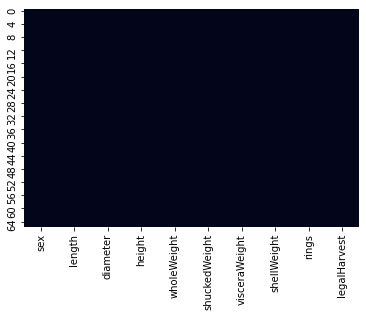

In [6]:
#visualize the location of missing values.
sns.heatmap(df.isnull(), cbar=False)

In [7]:
label_encoder = preprocessing.LabelEncoder() 

In [8]:
df['rings']= label_encoder.fit_transform(df['rings']) 

In [9]:
df['rings'].unique() 

array([ 8,  0,  2,  3,  1, 12,  9, 11,  7,  4,  5, 10,  6])

In [10]:
df.head()

,sex,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,rings,legalHarvest
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,8,1
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2,0
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,3,1
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            66 non-null     int64  
 1   length         66 non-null     float64
 2   diameter       66 non-null     float64
 3   height         66 non-null     float64
 4   wholeWeight    66 non-null     float64
 5   shuckedWeight  66 non-null     float64
 6   visceraWeight  66 non-null     float64
 7   shellWeight    66 non-null     float64
 8   rings          66 non-null     int64  
 9   legalHarvest   66 non-null     int64  
dtypes: float64(7), int64(3)
memory usage: 5.3 KB


In [12]:
# dropping the response variable so that X contains features 
X = df.drop(['legalHarvest'], axis=1)

In [13]:
X

,sex,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,8
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,3
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0
...,...,...,...,...,...,...,...,...,...
61,1,0.645,0.525,0.190,1.4635,0.6615,0.3435,0.435,11
62,1,0.460,0.355,0.140,0.4935,0.2160,0.1330,0.115,6
63,0,0.410,0.305,0.100,0.3630,0.1735,0.0650,0.110,4
64,1,0.495,0.390,0.125,0.6655,0.2840,0.1620,0.200,4


In [14]:
# Response variable with legalHarvest
y = df['legalHarvest'] 
y

0     1
1     0
2     0
3     1
4     0
     ..
61    1
62    1
63    0
64    1
65    0
Name: legalHarvest, Length: 66, dtype: int64

In [15]:
# splitting the data using strartied split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.67,random_state=42,stratify=y)

In [16]:
print(f"Train labels:\n{y_train}")
print(f"Test labels:\n{y_test}")

Train labels:
36    0
48    0
64    1
43    1
8     0
60    0
37    0
0     1
44    1
34    0
22    1
7     0
2     0
6     0
13    0
55    0
24    0
42    0
10    0
1     0
20    1
58    1
11    1
45    0
18    0
53    0
35    1
41    0
16    0
38    0
52    1
17    0
25    0
56    0
27    0
62    1
5     0
51    1
40    0
23    0
46    0
63    0
21    1
57    0
Name: legalHarvest, dtype: int64
Test labels:
19    0
14    0
39    0
3     1
61    1
33    0
47    0
49    1
54    0
9     0
15    1
12    1
4     0
59    0
26    0
32    1
29    1
65    0
31    0
28    0
50    0
30    0
Name: legalHarvest, dtype: int64


In [17]:
print(f"Numbers of train instances by class: {np.bincount(y_train)}")
print(f"Numbers of test instances by class: {np.bincount(y_test)}")

Numbers of train instances by class: [31 13]
Numbers of test instances by class: [15  7]


In [18]:
# Create Decision Tree classifer object
classf = DecisionTreeClassifier()

# Train Decision Tree Classifer
classf = classf.fit(X_train,y_train)

In [19]:
#Predict the response for test dataset
y_pred = classf.predict(X_test)

In [20]:
#validate the model
print(y_pred )

[0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0]


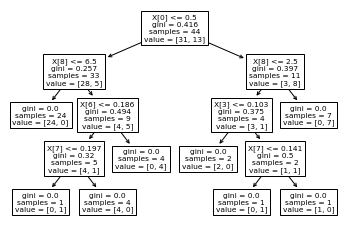

In [21]:
tree.plot_tree(classf);

In [22]:
confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))

[[14  1]
 [ 1  6]]


In [23]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9090909090909091


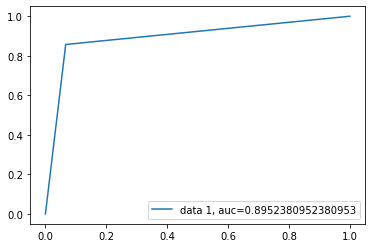

In [24]:
y_pred_proba = classf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()